# Proyecto películas: Obtención de métricas

# Índice
1. [Introducción](#in)
2. [Objetivos](#ob)
3. [Análisis exploratorio de datos (EDA)](#eda)
4. [Valores nulos y duplicados](#nd)
5. [Métricas](#me)
6. [Actores más comumes](#ac)
7. [Presupuesto (Budget)](#pe)
8. [Películas por año](#pa)
9. [Rentabilidad (revenue vs. budget)](#re)
10. [Géneros de películas](#ge)
11. [Duración a lo largo del tiempo](#du)
12. [Conclusión](#c)

#  Introducción  <a class="anchor" id="in"> </a>

A partir de un conjuto de datos relacionados con el mundo del entretenimiento en peliculas se realizará un analísis y se obtendrán disitintas métricas que muestren el comportamiento de los datos así como la interación adecuada con los mismos a la hora de limpiar y filtrar en caso de de ser necesario.

#  Objetivos <a class="anchor" id="ob"></a>

- Explora los datos:
    - Convertir los tipos de datos
    - Valores ausentes y duplicados 
- Análisis exploratorio de datos:
    - Métricas sobre:
        - Actores más comunes
        - Presupuesto
        - Películas por año
        - Rentabilidad
        - Géneros de peículas
        - Duración
- Conclusiones

#  Análisis exploratorio de datos (EDA) <a class="anchor" id="eda"></a>

Se importan las librerías necesarias para este proyecto

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from collections import Counter
from collections import defaultdict
import numpy as np
from scipy.stats import norm
import math
from statsmodels.stats.proportion import proportions_ztest 

Se cargan los datos los cuáles estarán contenidos en un data frame. 

In [3]:
movie=pd.read_csv(r"tmdb-movies.csv",sep=",")

Creación de funciones usadas a lo largo del proyecto, despliegan información general, valoes nulos y valores duplicados para el data frame.

In [4]:
def info(df,nombre):
    print(f"información para el data frame {nombre}")
    print(df.head())  #Primeras 5 filas del data frame
    print("\n")
    print(df.info(show_counts=True)) # Usando .info() en el data frame 
    print("\n")
    print(df.describe()) # Usando el .describe en el data frame
    print("\n")

def nulos(df,nombre):
    print(f"valores nulos del data frame {nombre}")
    print(df.isnull().sum())
    print("\n")

def duplicados(df,nombre):
    print(f"Valores dulicados en data frame {nombre}")
    print(df.duplicated().sum())

Usando las funciones para obtener información esencial del data frame.

In [12]:
info(movie,"movie")

información para el data frame movie
       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage        

#  Valores nulos y duplicados <a class="anchor" id="nd"></a>

Se usarán las funciones previas para obtener los valores nulos y duplicados.

## Valores nulos en los data frames

In [10]:
nulos(movie,"movie")

valores nulos del data frame movie
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64




Se toma la desición de rellenar los valores nulos de la siguiente manera:

- cast, director y production_companies con Unknown
- keywords con No keywords
- tagline con No tagline
- homepage con No homepage
- genres con No genre

Por otra parte se opta por eliminar las peliculas con valores nulos en columnas imdb_id y overview.

In [16]:
# Rellenar con texto si lo vas a usar luego en visualizaciones o análisis de texto
movie.fillna({
    'cast': 'Unknown',
    'director': 'Unknown',
    'keywords': 'No keywords',
    'tagline': 'No tagline',
    'homepage': 'No homepage',
    'genres': 'No genre',
    'production_companies': 'Unknown'
}, inplace=True)

# Eliminar los que tienen nulos críticos (pocos casos)
movie.dropna(subset=['overview', 'imdb_id'], inplace=True)

# Verificamos que ya no haya nulos:
print(movie.isnull().sum())

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


## Valores duplicados en los data frames

In [11]:
duplicados(movie,"movie")

Valores dulicados en data frame movie
1


Tratando valores duplcados

In [18]:
movie.drop_duplicates(inplace=True)
duplicados(movie,"movie")

Valores dulicados en data frame movie
0


Los datos han sido tratados para poder realizarse diversos analísis a lo largo del proyecto.

#  Métricas <a class="anchor" id="me"></a>

## Actores más coumes <a class="anchor" id="ac"></a>
Se obtienen los 10 actores más comunes de todas las peliculas, tomando en cuente que el elenco esta separado por "|".

In [22]:
cast_split = movie['cast'].str.split('|').dropna()
actors = Counter(
    actor.strip()
    for sublist in cast_split
    for actor in sublist
    if actor.strip() != 'Unknown'
)
actors.most_common(10)

[('Robert De Niro', 72),
 ('Samuel L. Jackson', 71),
 ('Bruce Willis', 62),
 ('Nicolas Cage', 61),
 ('Michael Caine', 53),
 ('Robin Williams', 51),
 ('John Cusack', 50),
 ('John Goodman', 49),
 ('Morgan Freeman', 49),
 ('Liam Neeson', 48)]

Podemos observas cuales son los actorees más solicitados o más presentes dentro de las peliculas, destacando a Robert De Niro, Samuel Ñ. Jackson y Bruce Willis como los tres principales. Creando un gráfico para visualizar resultados.

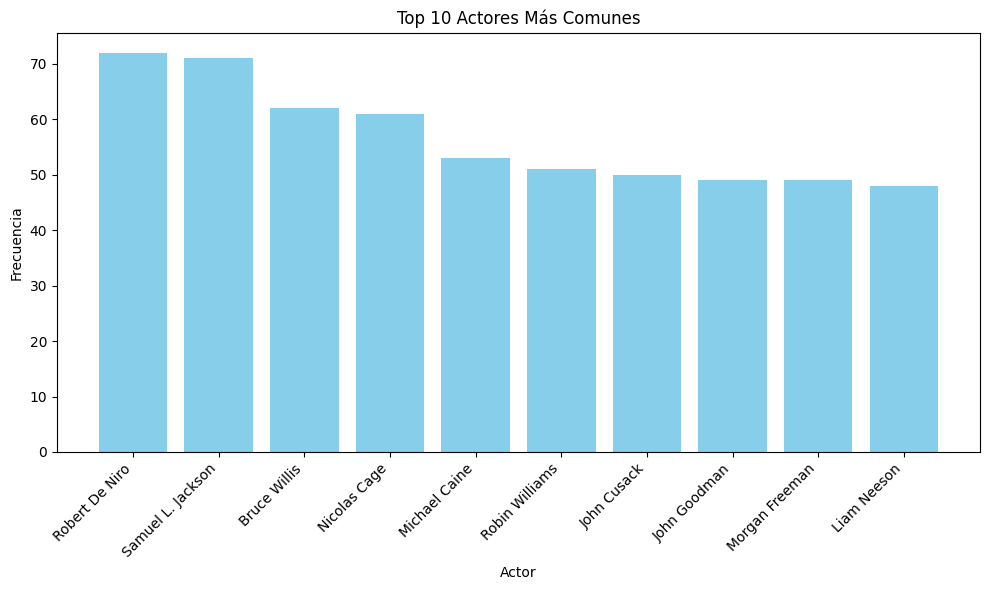

In [26]:
top_actors = dict(actors.most_common(10))

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_actors.keys(), top_actors.values(), color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Frecuencia')
plt.title('Top 10 Actores Más Comunes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Presupuesto (Budget) <a class="anchor" id="pe"></a>
Se obtendrán la distribución de presupuesto en una gráfica, las 5 peliculas con mayor y menor presupuesto y las estadísticas en general del presupuesto.

## Estadísticas básicas del presupuesto

In [27]:
movie['budget'].describe()

count    1.085200e+04
mean     1.464180e+07
std      3.092865e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

Podemos observar que el promedio de presupuesto en las películas esta en 14 millos de de dólares.

## Se obtienen las películas con más y con menor presupuesto.

In [ ]:
# Películas con más presupuesto (top 5)
top_5_budget = movie.sort_values('budget', ascending=False)[['original_title', 'budget']].head(5)
print("Top 5 películas con más presupuesto:")
print(top_5_budget)

# Películas con menos presupuesto (Top 5)
top_5_least_budget = movie[movie['budget'] > 0].sort_values('budget')[['original_title', 'budget']].head(5)
print("Top 5 películas con menos presupuesto:")
print(top_5_least_budget)

Top 5 películas con más presupuesto:
                                   original_title     budget
2244                            The Warrior's Way  425000000
3375  Pirates of the Caribbean: On Stranger Tides  380000000
7387     Pirates of the Caribbean: At World's End  300000000
14                        Avengers: Age of Ultron  280000000
6570                             Superman Returns  270000000
Top 5 películas con menos presupuesto:
                          original_title  budget
1151                         Fear Clinic       1
3065  Angus, Thongs and Perfect Snogging       1
3581             Love, Wedding, Marriage       1
2618                        Lost & Found       1
8944                        Death Wish 2       2


Se puede observar cuales son las películas que tienen mayor presupuesto están arriba de los 250000000 de dólares, mientras que las películas con menos presupuesto tenemos inconsistencias, las razones por las que no se presentan de manera adecuada pueden ser:
- Los datos no estaban disponibles o no fueron ingresados correctamente en el dataset, y el valor de budget se asignó por defecto a 1.
- Es posible que estas películas sean muy pequeñas o sean de producciones independientes que no tienen un presupuesto significativo, pero incluso en esos casos, un presupuesto de 1 dólar parece un valor incorrecto, es decir, no se tomo la importancicia necesaria.
- Algunas películas pueden no haber declarado su presupuesto real, y en algunos datasets, cuando no hay valor disponible, se asigna un valor ficticio como 1 para representar un dato ausente o indefinido.

Se ha buscado cual ha sido la película independiente con menor presupuesto utilizado y la respuesta fue El Mariachi (1992) filme, dirigido por Robert Rodríguez, que se convirtió en un éxito a pesar de su bajo presupuesto de 7.000 dólares. 

Tomando el umbral de 7000 dólares.

In [34]:
# Filtrar películas con presupuesto de al menos 7000 USD
movie_cleaned = movie[movie['budget'] >= 7000]

# Películas con menor presupuesto (Top 5) en el dataset limpio
top_5_least_budget = movie_cleaned.sort_values('budget')[["id",'original_title', 'budget']].head(5)
print("Top 5 películas con menos presupuesto (reales):")
print(top_5_least_budget)

Top 5 películas con menos presupuesto (reales):
          id  original_title  budget
7044   14337          Primer    7000
4806  138941           Found    8000
3755   79120         Weekend    8000
1354     985      Eraserhead   10000
2122   51200  í¬í™” ì†ìœ¼ë¡œ   10000


Con este cambio podemos ver películas con un presupuesto bajo pero no extremo y poco realista.

## Películas por año <a class="anchor" id="pa"></a>

Se obtendrán cuántas películas se hicieron cada año.

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    436
2008    496
2009    531
2010    487
2011    538
2012    586
2013    658
2014    699
2015    628
Name: count, dtype: int64


<Axes: xlabel='release_year'>

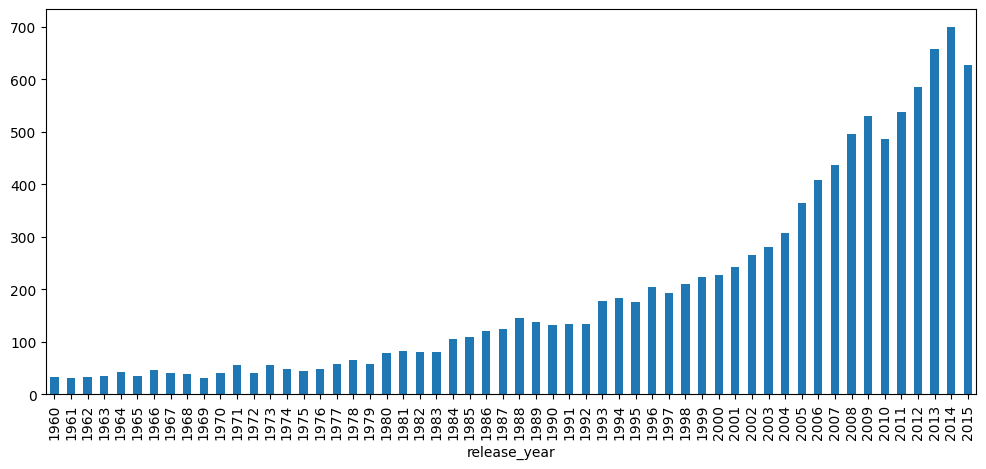

In [36]:
pa=movie['release_year'].value_counts().sort_index()
print(pa)
movie['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))

A través de los años observamos que el número de películas tiende a aumentar cada vez más.

 ##  Rentabilidad (revenue vs. budget) <a class="anchor" id="re"></a>

Películas que fueron las más rentables.

In [46]:
#movie_cleaned['return'] = movie_cleaned['revenue'] / movie_cleaned['budget']
movie_cleaned.loc[:, 'return'] = movie_cleaned['revenue'] / movie_cleaned['budget']
movie_cleaned.sort_values('return', ascending=False)[['original_title', 'return']]
#print(movie_cleaned[["original_title", "revenue", "budget", "return"]].head(10))
top_returns = movie_cleaned.sort_values('return', ascending=False)[["original_title", "revenue", "budget", "return"]].head(10)
print(top_returns)

                     original_title    revenue  budget        return
7447            Paranormal Activity  193355800   15000  12890.386667
2449        The Blair Witch Project  248000000   25000   9920.000000
1354                     Eraserhead    7000000   10000    700.000000
7277                 Pink Flamingos    6000000   12000    500.000000
7178                  Super Size Me   28575078   65000    439.616585
242                     The Gallows   42664410  100000    426.644100
7057                     Open Water   54667954  130000    420.522723
9762   The Texas Chain Saw Massacre   30859000   85000    363.047059
7827                        Mad Max  100000000  400000    250.000000
10759                     Halloween   70000000  300000    233.333333


Con esto podemos tener que películas hicieron una pequeña inversión y obtuvieron mayores ganacias.

 ##  Géneros de películas <a class="anchor" id="ge"></a>

Se obtendrá el promedio de ingreso y presupuesto por géneros más rentables 

In [57]:
# Crear diccionarios para sumar revenue y budget por género
genre_revenue = defaultdict(list)
genre_budget = defaultdict(list)

# Iterar sobre el DataFrame
for i, row in movie_cleaned.iterrows():
    if pd.notnull(row['genres']):
        genres = row['genres'].split('|')
        for genre in genres:
            genre_revenue[genre.strip()].append(row['revenue'])
            genre_budget[genre.strip()].append(row['budget'])

genre_avg_revenue = {genre: sum(vals)/len(vals) for genre, vals in genre_revenue.items()}
genre_avg_budget = {genre: sum(vals)/len(vals) for genre, vals in genre_budget.items()}

# Combinar en un DataFrame
genre_df = pd.DataFrame({
    'avg_revenue': genre_avg_revenue,
    'avg_budget': genre_avg_budget
}).T  # transponemos para tener los géneros como índices

genre_df = genre_df.T  # volvemos a transponer para acomodar columnas
genre_df = genre_df.sort_values('avg_revenue', ascending=False)

print(genre_df.head(10))

                  avg_revenue    avg_budget
Animation        2.010950e+08  6.299100e+07
Adventure        1.819438e+08  6.149974e+07
Fantasy          1.728414e+08  5.974624e+07
Family           1.661371e+08  5.540529e+07
Science Fiction  1.224191e+08  4.416032e+07
Action           1.204050e+08  4.688164e+07
War              8.246939e+07  3.686803e+07
Comedy           7.711427e+07  2.942765e+07
Thriller         7.245863e+07  3.080219e+07
Mystery          7.166990e+07  2.987782e+07


Calculando la rentabilidad por género. 

                  avg_revenue    avg_budget    return
Animation        2.010950e+08  6.299100e+07  3.192441
Family           1.661371e+08  5.540529e+07  2.998578
Adventure        1.819438e+08  6.149974e+07  2.958447
Music            6.732211e+07  2.305964e+07  2.919478
Fantasy          1.728414e+08  5.974624e+07  2.892925
Science Fiction  1.224191e+08  4.416032e+07  2.772152
Romance          6.730698e+07  2.529898e+07  2.660462
Documentary      1.336183e+07  5.086548e+06  2.626896
Comedy           7.711427e+07  2.942765e+07  2.620470
Horror           3.522477e+07  1.353629e+07  2.602248


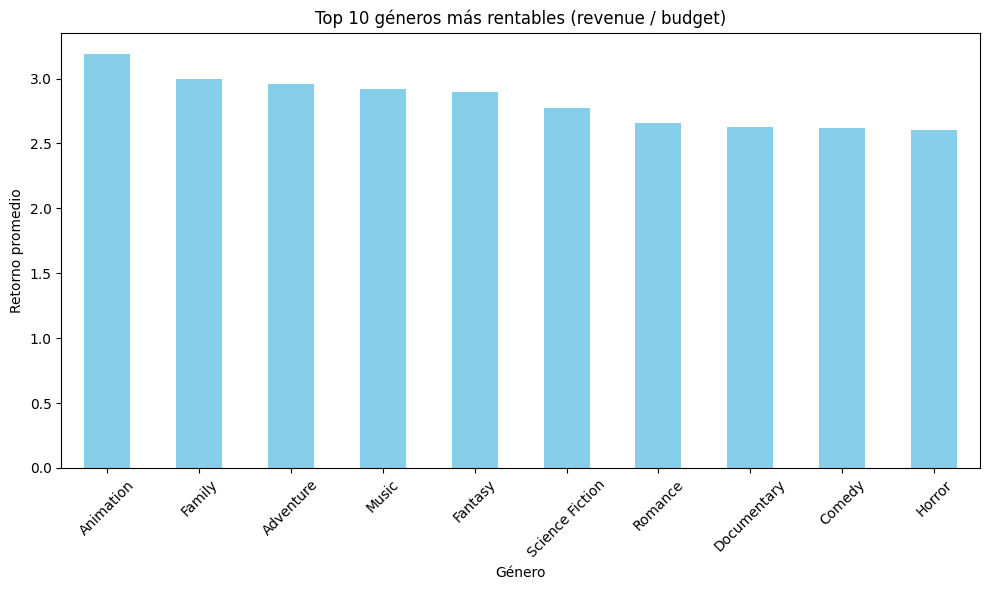

In [59]:
genre_df['return'] = genre_df['avg_revenue'] / genre_df['avg_budget']
gdf=genre_df.sort_values('return', ascending=False).head(10)
print(gdf)

gdf.sort_values('return', ascending=False).head(10).plot(
    y='return',
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    legend=False
)
plt.title('Top 10 géneros más rentables (revenue / budget)')
plt.ylabel('Retorno promedio')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ##  Duración a lo largo del tiempo<a class="anchor" id="du"></a>

Se obtendrá el promedio del tiempo de las películas a lo largo de los años.

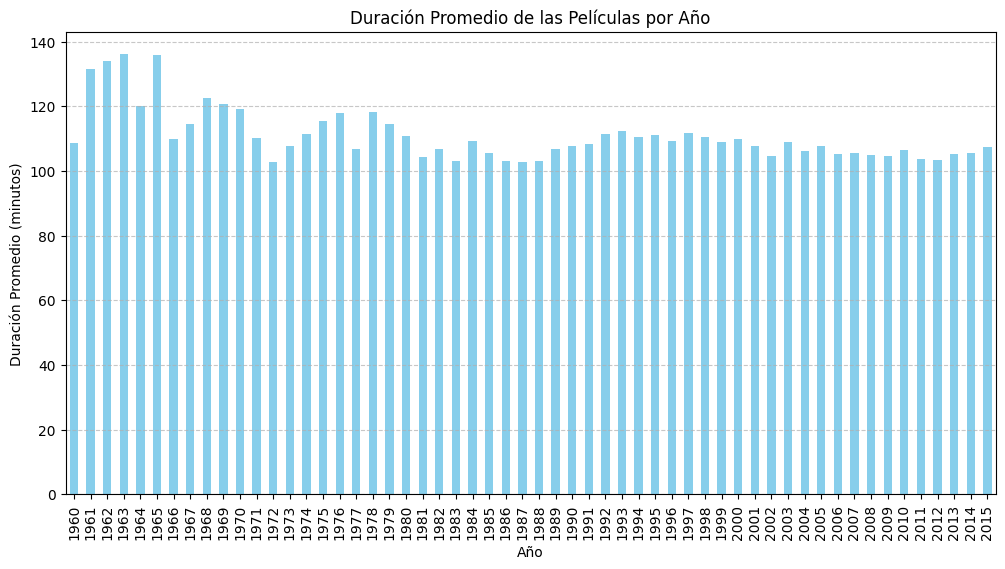

In [64]:
# Calcular la duración promedio de las películas por año
avg_runtime_by_year = movie_cleaned.groupby('release_year')['runtime'].mean()

# Graficar
plt.figure(figsize=(12, 6))
avg_runtime_by_year.plot(kind='bar', color='skyblue')

# Personalización del gráfico
plt.title('Duración Promedio de las Películas por Año')
plt.xlabel('Año')
plt.ylabel('Duración Promedio (minutos)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Se puede observar que a lo largo de los años el promedio de duración de las películas no ha cambiado significativamente. Sin embargo, entre los años 1960 y 1965 se nota un valor ligeramente mayor en comparación con los años posteriores. Esto sugiere que, en general, la industria cinematográfica ha mantenido un tiempo de duración establecido para las proyecciones a lo largo del tiempo.

 ##  Conclusión<a class="anchor" id="c"></a>
 
En este análisis se observa una gran diversidad en los presupuestos de las películas a lo largo del tiempo. Por un lado, se encuentran producciones con presupuestos muy bajos, como The Blair Witch Project (con solo $25,000) y Paranormal Activity ($15,000), que lograron rendimientos extraordinarios. Por otro lado, existen grandes producciones con presupuestos elevados, como Pirates of the Caribbean: On Stranger Tides ($380,000,000) y The Warrior's Way ($425,000,000), pero con una rentabilidad mucho más moderada en comparación con las películas de bajo presupuesto.

El análisis de la rentabilidad muestra que las películas con menores presupuestos pueden ofrecer un retorno de inversión significativamente mayor. Ejemplos como The Blair Witch Project y Paranormal Activity destacan por sus impresionantes ratios de rentabilidad, lo que refuerza la idea de que una película exitosa no necesariamente requiere grandes presupuestos. Este tipo de éxito puede depender más de la creatividad, el enfoque de marketing y la conexión con el público objetivo.

Además, a lo largo de los años, el número de producciones ha ido en aumento, alcanzando su punto máximo entre 2013 y 2015. Esto indica que la industria cinematográfica se encuentra en constante expansión, especialmente con el incremento de la inversión en películas de gran presupuesto. Sin embargo, a pesar de este crecimiento, la rentabilidad de algunas de las películas más populares no ha sido directamente proporcional al presupuesto, lo que sugiere que factores como el guion, la dirección y la recepción del público son determinantes clave en el éxito de una película.

Esto revela una tendencia interesante en la industria cinematográfica: las películas de bajo presupuesto y con enfoques innovadores tienen la capacidad de generar retornos sorprendentes, como lo demuestran los casos de Paranormal Activity y The Blair Witch Project. Aunque las producciones de alto presupuesto siguen dominando el mercado con títulos como Pirates of the Caribbean y Avengers, los datos indican que el dinero no siempre garantiza el éxito.

El retorno de inversión se presenta como un indicador clave, y este análisis demuestra que las películas de bajo presupuesto pueden ser mucho más rentables en proporción a lo invertido. El éxito en la industria del cine no depende exclusivamente de grandes inversiones, sino de una combinación de factores creativos, marketing efectivo y la capacidad de captar la atención del público.

Finalmente, el crecimiento constante en la cantidad de películas producidas —especialmente en años recientes— resalta la creciente competencia en el sector. No obstante, el verdadero desafío continúa siendo cómo mantener tanto la calidad como la rentabilidad a medida que aumenta el número de producciones, ya que no necesariamente una película es de calidad por ser rentable, ni es rentable por ser de calidad.
